Let's import required modules..

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import necessary libraries
import tensorflow as tf  # TensorFlow for machine learning tasks
import seaborn as sns    # Seaborn for statistical visualization
import matplotlib.pyplot as plt  # Matplotlib for plotting
from tensorflow import keras     # Keras for building neural networks
import numpy as np      # NumPy for numerical computations
import os              # OS module for interacting with the operating system
import pandas as pd    # Pandas for data manipulation and analysis
import itertools       # Itertools for creating iterators
from tensorflow.keras.utils import image_dataset_from_directory  # Utility for loading image datasets
from tensorflow.keras.layers import BatchNormalization, Dropout   # Layers for neural networks
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay  # Metrics for model evaluation
from tensorflow.keras.preprocessing import image   # Utility for image preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
Root = "/content/drive/MyDrive/Colab Notebooks/new plant dataset"
os.chdir(Root)

In [4]:
base_dir ="/content/drive/MyDrive/Colab Notebooks/new plant dataset"
train_dir = os.path.join(base_dir,"train")
valid_dir = os.path.join(base_dir,"valid")
test_dir = os.path.join(base_dir,"test")
diseases = os.listdir(train_dir)# printing the disease names
print(diseases)

['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites Two-spotted_spider_mite', 'Tomato_Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus']


Exploring the data

In [5]:
train_data = "/content/drive/MyDrive/Colab Notebooks/new plant dataset/train"
valid_data = "/content/drive/MyDrive/Colab Notebooks/new plant dataset/valid"

# Load the training and validation dataset as an image dataset
train_gen = image_dataset_from_directory(directory=train_data, image_size=(256, 256))
valid_gen = image_dataset_from_directory(directory=valid_data, image_size=(256, 256))

# Normalize the pixel values of images in the training and validation dataset
train_gen = train_gen.map(lambda image, label: (image / 255.0, label))
valid_gen = valid_gen.map(lambda image, label: (image / 255.0, label))

Found 18345 files belonging to 10 classes.
Found 4585 files belonging to 10 classes.


In [6]:
#Our Classes^_^

# Get the list of class names by listing directories in the training dataset
class_names = sorted(os.listdir("/content/drive/MyDrive/Colab Notebooks/new plant dataset/train"))
# Print the total number of classes
print(f'The total number of classes is: {len(class_names)}')

# Iterate through the class names and print each one
for class_name in class_names:
    print(class_name)

The total number of classes is: 10
Tomato_Bacterial_spot
Tomato_Early_blight
Tomato_Late_blight
Tomato_Leaf_Mold
Tomato_Septoria_leaf_spot
Tomato_Spider_mites Two-spotted_spider_mite
Tomato_Target_Spot
Tomato_Yellow_Leaf_Curl_Virus
Tomato_healthy
Tomato_mosaic_virus


In [7]:
# Identify unique plants and count the number of diseases ^_^

# Get the list of diseases by listing directories in the training data
diseases = os.listdir(train_data)
# Initialize lists to store unique plants and count the number of diseases
plants = []
NumberOfDiseases = 0

# Iterate through each disease
for plant in diseases:
    # Check if the plant name is not already in the list of unique plants
    if plant.split('_')[0] not in plants:
        # Add the unique plant name to the list
        plants.append(plant.split('_')[0])
    # Check if the disease is not labeled as 'healthy'
    if plant.split('_')[1] != 'healthy':
        # Increment the count of diseases
        NumberOfDiseases += 1

# Print the number of unique plants in the dataset
print("Number of plants: {}".format(len(plants)))
print('-'*50)
print(f"Unique Plants are: \n{plants}")
print()

# Print the number of unique diseases (excluding 'healthy')
print("Number of unique diseases (without healthy): {}".format(NumberOfDiseases))
print('-'*50)
print(f"Unique Plants are: \n{diseases}")

Number of plants: 1
--------------------------------------------------
Unique Plants are: 
['Tomato']

Number of unique diseases (without healthy): 9
--------------------------------------------------
Unique Plants are: 
['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites Two-spotted_spider_mite', 'Tomato_Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus']


In [8]:
#LOOK at shape of one photo :)

# Define the path to the image file
import cv2
img_path = "/content/drive/MyDrive/Colab Notebooks/new plant dataset/train/Tomato_Early_blight/0abc57ec-7f3b-482a-8579-21f3b2fb780b___RS_Erly.B 7609.JPG"
# Read the image using OpenCV
img = cv2.imread(img_path)
# Print the shape of the image
print("Image shape:", img.shape)

Image shape: (256, 256, 3)


Data visualization

In [9]:
#Empty dictionaries to store count of images for each class in training and validation datasets ^_^
nums_train = {}
nums_valid = {}

# Iterate over each disease in the list of diseases
for disease in diseases:
    #Count and store number of images for the current disease in the training and validation dataset
    nums_train[disease] = len(os.listdir(train_data+'/'+disease))
    nums_valid[disease] = len(os.listdir(valid_data+'/'+disease))

# Create pandas DataFrames to display the count of images for each disease in the training and validation datasets
image_class_count_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=['No. of images'])
image_class_count_valid = pd.DataFrame(nums_valid.values(), index=nums_valid.keys(), columns=['No. of images'])

Training data images count per class : 
                                             No. of images
Tomato_Bacterial_spot                                 1702
Tomato_Early_blight                                   1920
Tomato_healthy                                        1926
Tomato_Late_blight                                    1851
Tomato_Leaf_Mold                                      1882
Tomato_Septoria_leaf_spot                             1745
Tomato_Spider_mites Two-spotted_spider_mite           1741
Tomato_Target_Spot                                    1827
Tomato_Yellow_Leaf_Curl_Virus                         1961
Tomato_mosaic_virus                                   1790


<Axes: title={'center': 'Training data images count per class'}, xlabel='Number of images', ylabel='Classes'>

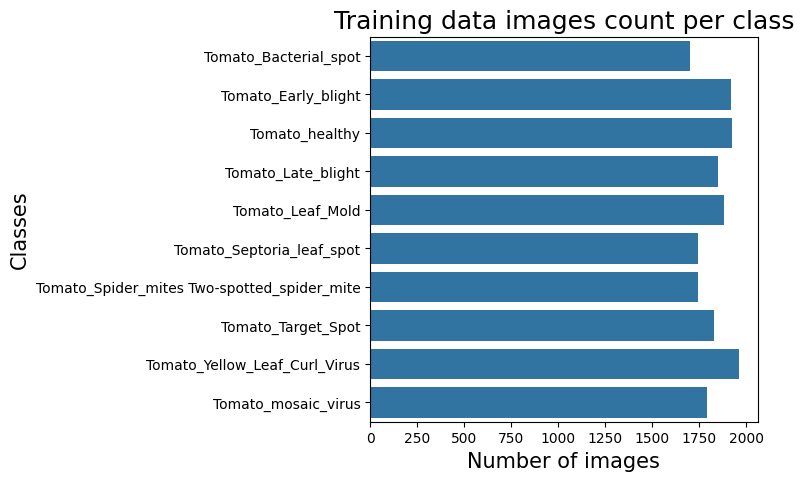

In [10]:
# Print the count of training data images per class ^_^
print('Training data images count per class : ')
print(image_class_count_train)

# Create a bar plot showing the count of training images per class
plt.figure(figsize=(5,5))
plt.title("Training data images count per class",fontsize=18)
plt.xlabel('Number of images', fontsize=15)
plt.ylabel('Classes', fontsize=15)

# Extract keys and values from the dictionary
keys = list(nums_train.keys())
vals = list(nums_train.values())

# Plot the bar plot using seaborn
sns.barplot(y=keys, x=vals)


Validation data images count per class : 
                                             No. of images
Tomato_Bacterial_spot                                  425
Tomato_Early_blight                                    480
Tomato_healthy                                         481
Tomato_Late_blight                                     463
Tomato_Leaf_Mold                                       470
Tomato_Septoria_leaf_spot                              436
Tomato_Spider_mites Two-spotted_spider_mite            435
Tomato_Target_Spot                                     457
Tomato_Yellow_Leaf_Curl_Virus                          490
Tomato_mosaic_virus                                    448


<Axes: title={'center': 'Validation data images count per class'}, xlabel='Number of images', ylabel='Classes'>

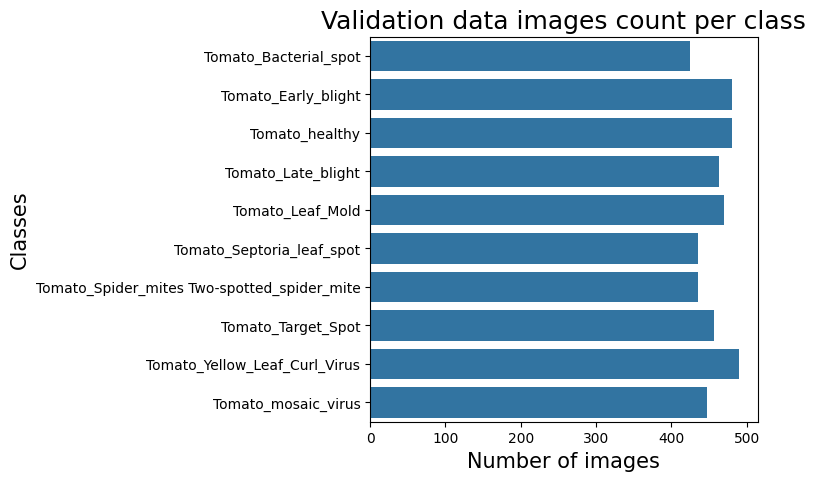

In [11]:
# Print the count of validation data images per class ^_^
print('Validation data images count per class : ')
print(image_class_count_valid)

# Create a bar plot showing the count of validation images per class
plt.figure(figsize=(5,5))
plt.title("Validation data images count per class",fontsize=18)
plt.xlabel('Number of images', fontsize=15)
plt.ylabel('Classes', fontsize=15)

# Extract keys and values from the dictionary
keys = list(nums_valid.keys())
vals = list(nums_valid.values())

# Plot the bar plot using seaborn
sns.barplot(y=keys, x=vals)

In [12]:
# Visualize Images :)

plt.figure(figsize=(30,30))#Set figure size to 40 inches in width and 30 inches in height
plt.subplots_adjust(wspace=0.1,hspace=0.1)# width and height space between subplots to 0.1

# Iterate over a range of 24 (to display 24 images)
for i in range(10):
    #Get a random folder index within the range of available folders in the training data
    random_folder = np.random.randint(0, len(os.listdir(train_data)))
    #Get the path of the randomly selected folder
    random_folder_path = os.path.join(train_data, os.listdir(train_data)[random_folder])
    #Get a random image index within the range of available images in the selected folder
    random_image = np.random.randint(0, len(os.listdir(random_folder_path)))

    #Get the path of the randomly selected image and Read the image using OpenCV
    random_image_path = os.path.join(random_folder_path, os.listdir(random_folder_path)[random_image])
    image = cv2.imread(random_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert the image from (BGR to RGB)

    #Get the class name for the current image
    class_name = class_names[random_folder]

    # Create a subplot with 4 rows and 6 columns, and set the current subplot index
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)#Display the image
    plt.axis("off")#Turn off the axis
    plt.title(class_name, fontsize=25)#Set the title of the subplot to the class name

# Display the entire plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Modelling

Building the model architecture
We are going to use CNN..

In [13]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))
model.add(BatchNormalization())

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))
model.add(BatchNormalization())

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(BatchNormalization())
model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 85, 85, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        3

Training the model..

In [14]:
history = model.fit(
    train_gen,  # Training data generator
    validation_data=valid_gen,  # Validation data generator
    epochs=5  # Number of epochs for training
)

Epoch 1/5
574/574 [==============================] - 3373s 6s/step - loss: 0.8428 - accuracy: 0.7593 - val_loss: 1.9258 - val_accuracy: 0.5210
Epoch 2/5
574/574 [==============================] - 106s 182ms/step - loss: 0.3230 - accuracy: 0.8929 - val_loss: 1.2140 - val_accuracy: 0.7053
Epoch 3/5
574/574 [==============================] - 107s 186ms/step - loss: 0.2012 - accuracy: 0.9335 - val_loss: 0.4706 - val_accuracy: 0.8748
Epoch 4/5
574/574 [==============================] - 102s 176ms/step - loss: 0.1478 - accuracy: 0.9515 - val_loss: 0.4603 - val_accuracy: 0.8667
Epoch 5/5
574/574 [==============================] - 104s 179ms/step - loss: 0.1179 - accuracy: 0.9605 - val_loss: 0.2377 - val_accuracy: 0.9309


Plotting

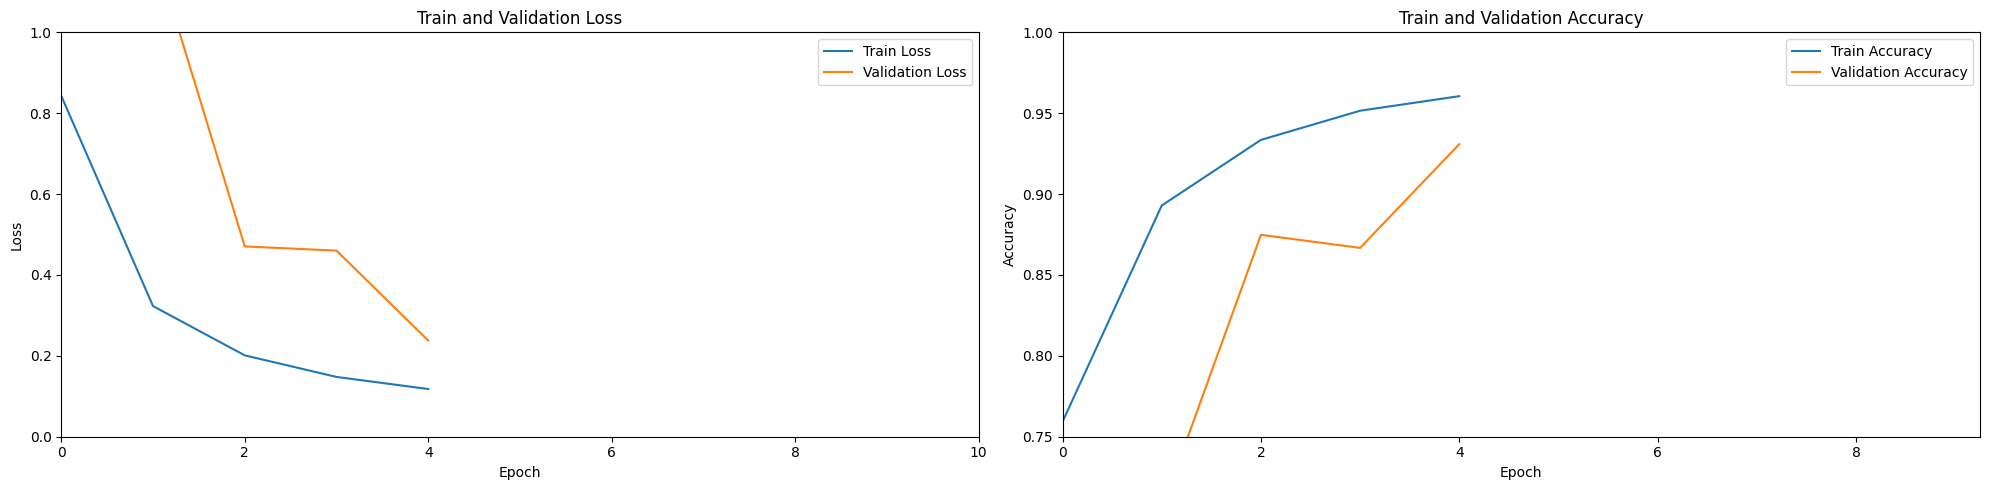

In [15]:
# Plotting the training and validation loss and accuracy ^_^
plt.figure(figsize=(20, 5))

# Subplot for training and validation loss
plt.subplot(1, 2, 1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0, 1.0)
plt.legend()

# Subplot for training and validation accuracy
plt.subplot(1, 2, 2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75, 1.0)
plt.legend()

plt.tight_layout()


In [16]:
# Obtain and Flatten Labels and Predictions for Validation Data ^_^
import tensorflow as tf
import itertools

# Initialize lists to store labels and predictions
labels = []
predictions = []

# Iterate over the validation generator to get labels and predictions
for x, y in valid_gen:
    labels.append(list(y.numpy()))#Append true labels
    predictions.append(tf.argmax(model.predict(x), 1).numpy())#Append predicted labels

# Flatten the lists of lists
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

1/1 [==============================] - 0s 149ms/step


Display model performance

In [17]:
# Print evaluation metrics based on the model's performance ^_^
#All multiplied by 100 and formatted to two decimal places.

#Train Accuracy: retrieves the last recorded training accuracy from the training history
print("Train Accuracy: {:.2f} %".format(history.history['accuracy'][-1]*100))

#Test Accuracy: computes accuracy score by comparing true labels with predicted labels
print("Test Accuracy: {:.2f} %".format(accuracy_score(labels, predictions) * 100))

#Precision Score: computes the precision score using the micro averaging strategy.
print("Precision Score: {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))

#Recall Score: computes the recall score using the micro averaging strategy
print("Recall Score: {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy: 96.05 %
Test Accuracy: 93.09 %
Precision Score: 93.09 %
Recall Score: 93.09 %


confusion matrix

<Figure size 2000x500 with 0 Axes>

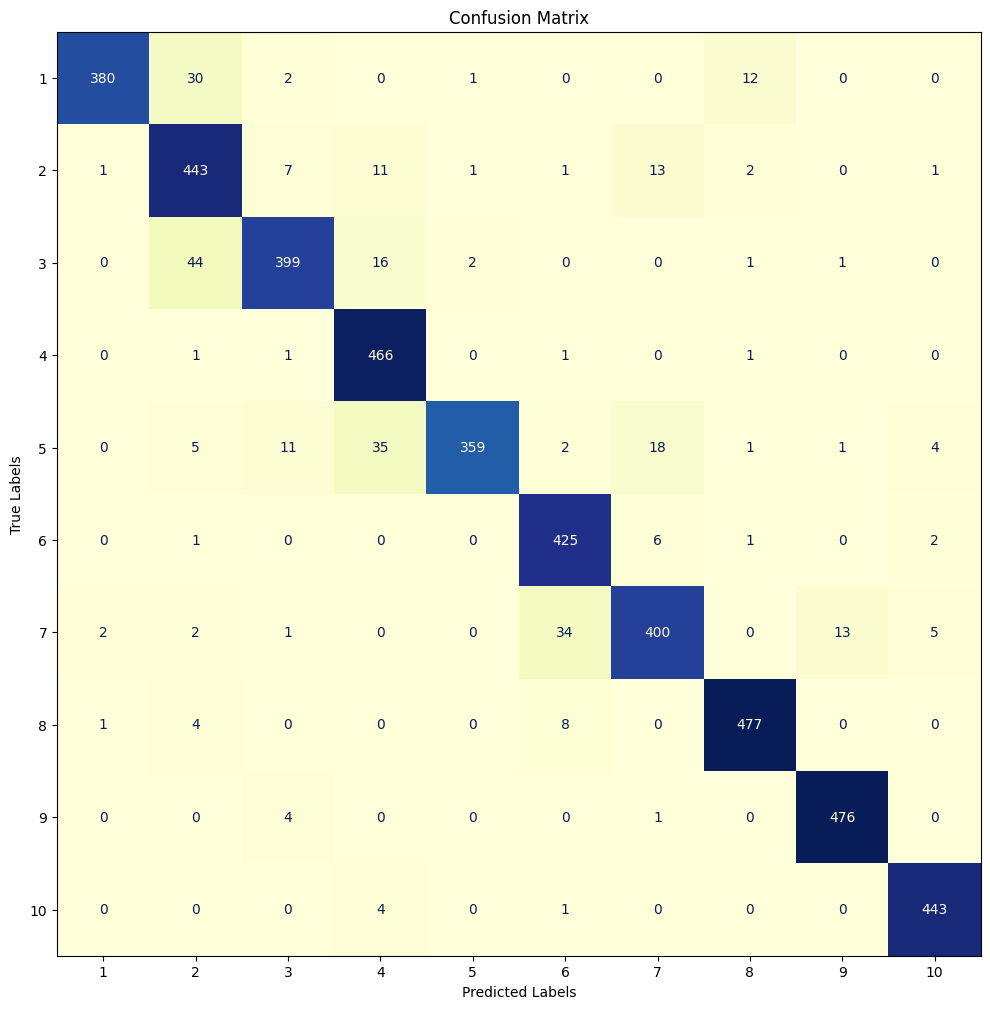

In [18]:
# Plot a confusion matrix based on the true labels and predicted labels ^_^
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,11)))
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

visualize and predict one image

In [19]:
# Load and preprocess the image
from tensorflow.keras.preprocessing import image
img_path = '/content/drive/MyDrive/Colab Notebooks/new plant dataset/test/TomatoEarlyBlight1.JPG'
img = image.load_img(img_path, target_size=(256,256))
img_array = image.img_to_array(img)
img_array = img_array.astype("float32") / 255.0
img_array = tf.expand_dims(img_array, 0)

Text(0.5, 0.98, '(224, 224, 3)')

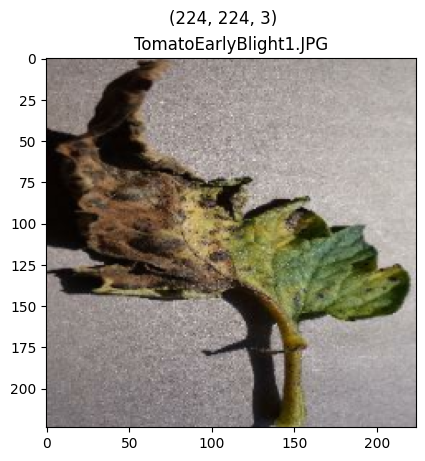

In [20]:
#visualize your image using function load_prep ^_^
def load_prep(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, size=(224,224))
    return img

# Load and preprocess the image
image = load_prep(img_path)

# Visualize the preprocessed image
plt.imshow(image/255.)
plt.title('TomatoEarlyBlight1.JPG')
plt.suptitle(image.shape)

In [21]:
predictions = model.predict(img_array)
predictions

1/1 [==============================] - 1s 676ms/step


array([[3.8195769e-03, 3.1516361e-01, 5.5734992e-01, 1.0240593e-02,
        9.5453002e-02, 4.2390227e-03, 5.8578486e-03, 2.4019273e-03,
        1.3873258e-03, 2.1257554e-03, 7.0408598e-05, 8.4724648e-05,
        7.6003118e-05, 6.8880057e-05, 1.0237829e-04, 7.0190981e-05,
        4.8843787e-05, 5.4205775e-05, 6.5289933e-05, 7.9889927e-05,
        7.2472838e-05, 1.0487050e-04, 5.7318539e-05, 6.5438733e-05,
        7.0298032e-05, 6.8137786e-05, 5.7513527e-05, 5.5543751e-05,
        8.2286795e-05, 6.2701467e-05, 6.5362205e-05, 6.7999332e-05,
        5.4178799e-05, 7.2832721e-05, 7.0774971e-05, 9.4504096e-05,
        5.7360150e-05, 6.1036866e-05]], dtype=float32)

In [22]:
predicted_class = np.argmax(predictions)
print(f"this image : Predicted Class: {predicted_class}, Class name: {class_names[predicted_class]}")

this image : Predicted Class: 2, Class name: Tomato_Late_blight


Testing model on test data

In [23]:
# Predict plant diseases for each image in the test directory ^_^
from tensorflow.keras.preprocessing import image
images_dir ="/content/drive/MyDrive/Colab Notebooks/new plant dataset/test"

# Iterate through each image in the directory
image_files = os.listdir(images_dir)
for img_file in image_files:
    # Construct the full path to the image
    img_path = os.path.join(images_dir, img_file)

    # Load the image and preprocess it
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = img_array.astype("float32") / 255.0
    img_array_batch = np.expand_dims(img_array, axis=0)

    # Make predictions using the model
    predictions = model.predict(img_array_batch)
    predicted_class = np.argmax(predictions)

    # Print the prediction results
    print(f"Image: {img_file}, Predicted Class: {predicted_class}, Class name: {class_names[predicted_class]}")

1/1 [==============================] - 0s 27ms/step
Image: TomatoHealthy3.JPG, Predicted Class: 8, Class name: Tomato_healthy
1/1 [==============================] - 0s 18ms/step
Image: TomatoEarlyBlight3.JPG, Predicted Class: 1, Class name: Tomato_Early_blight
1/1 [==============================] - 0s 19ms/step
Image: TomatoHealthy2.JPG, Predicted Class: 8, Class name: Tomato_healthy
1/1 [==============================] - 0s 17ms/step
Image: TomatoEarlyBlight2.JPG, Predicted Class: 1, Class name: Tomato_Early_blight
1/1 [==============================] - 0s 20ms/step
Image: TomatoHealthy1.JPG, Predicted Class: 8, Class name: Tomato_healthy
1/1 [==============================] - 0s 19ms/step
Image: TomatoEarlyBlight4.JPG, Predicted Class: 1, Class name: Tomato_Early_blight
1/1 [==============================] - 0s 18ms/step
Image: TomatoYellowCurlVirus2.JPG, Predicted Class: 7, Class name: Tomato_Yellow_Leaf_Curl_Virus
1/1 [==============================] - 0s 18ms/step
Image: TomatoEar

Visualize random images with their predicted classes

In [24]:
# Create a figure to display the images ^_^
from tensorflow.keras.preprocessing import image
import random
plt.figure(figsize=(20,20))

# Iterate through 9 random images
for i in range(9):
    plt.subplot(3,3,i+1)

    # Select a random image from the directory
    rn = random.choice(os.listdir(images_dir))
    img_path = os.path.join(images_dir, rn)

    # Preprocess the image
    new_img = load_prep(img_path)

    # Load and preprocess the image for prediction
    photo = image.load_img(img_path, target_size=(256,256))
    photo_array = image.img_to_array(photo)
    photo_array = photo_array.astype("float32") / 255.0
    photo_array = tf.expand_dims(photo_array, 0)
    predictions_photo_array = model.predict(photo_array)
    pred_class_ = np.argmax(predictions_photo_array)

    # Display the image and its predicted class
    plt.imshow(new_img/255.)
    plt.title(f'true:{rn} \npred_class:{pred_class_} \nClassname: {class_names[pred_class_]}')
    plt.axis(False)

Output hidden; open in https://colab.research.google.com to view.

Finally..Saving our model

In [25]:
# save it as a h5 file ^_^
from tensorflow.keras.models import load_model
model.save('models.h5')